#Image Categorization of the CIFAR-10 Dataset via Convolutional Neural Networks

##This notebook demonstrates the classification of low-resolution images from the TensorFlow Keras CIFAR-10 repository. The dataset comprises ten distinct categories, as illustrated below. We will implement a Convolutional Neural Network (CNN) architecture to perform this task.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Dataset

In [5]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Currently, y_train is a 2D array, but a 1-dimensional format is better suited for our classification task. Therefore, we will flatten it into a 1D array now

In [10]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Let's plot some images to see what they are

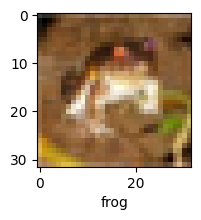

In [15]:
def plot_sample(x,y,index):
  plt.figure(figsize= (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,0)

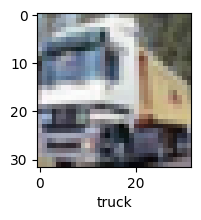

In [16]:
plot_sample(x_train,y_train,1)

# Normalize Input Data
Rescale the RGB image channels from their original 8-bit range (0–255) to a floating-point range of 0.0 to 1.0. This is done simply by dividing the entire array by 255, ensuring consistent input for our model.

# Normalizing the training data

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build simple artificial neural network for image classification

In [19]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 86ms/step - accuracy: 0.3046 - loss: 1.9326
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.4189 - loss: 1.6493
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4478 - loss: 1.5631
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.4760 - loss: 1.4916
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 83ms/step - accuracy: 0.4870 - loss: 1.4414


# You can see that at the end of 5 epochs, accuracy is at around 48%

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.53      0.55      1000
           1       0.36      0.81      0.50      1000
           2       0.42      0.30      0.35      1000
           3       0.39      0.19      0.26      1000
           4       0.41      0.41      0.41      1000
           5       0.41      0.38      0.39      1000
           6       0.53      0.55      0.54      1000
           7       0.49      0.61      0.55      1000
           8       0.69      0.54      0.60      1000
           9       0.52      0.34      0.42      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



# Let us build a convolutional netural to train our images

In [26]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3801 - loss: 1.6923
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 59ms/step - accuracy: 0.5876 - loss: 1.1754
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 38ms/step - accuracy: 0.6478 - loss: 1.0097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6832 - loss: 0.9120
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7088 - loss: 0.8377
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7307 - loss: 0.7807
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7430 - loss: 0.7303
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7610 - loss: 0.6910
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7686 - loss: 0.6628
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7869 - loss: 0.6049


# With CNN, at the end 10 epochs, accuracy was at around 78% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [30]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6957 - loss: 0.9361


[0.9336159229278564, 0.6934999823570251]

In [31]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[4.4516972e-04, 1.5029409e-04, 1.7487956e-03, 9.4575655e-01,
        3.9111864e-04, 4.2916581e-02, 6.7308364e-03, 2.0281981e-05,
        1.6773313e-03, 1.6302323e-04],
       [9.0915989e-04, 1.8299884e-01, 1.3407531e-07, 3.5672406e-06,
        1.0081165e-07, 2.2515894e-09, 2.0446683e-08, 3.1015311e-08,
        8.1463116e-01, 1.4569528e-03],
       [2.6785687e-02, 6.5072185e-01, 3.5060613e-04, 2.5781377e-03,
        1.3741776e-03, 4.3807365e-04, 4.3981380e-04, 3.3243194e-03,
        2.4238975e-01, 7.1597576e-02],
       [8.0292004e-01, 3.0497968e-04, 6.0650571e-03, 9.1387512e-04,
        2.8428140e-03, 2.0489391e-05, 4.5087753e-04, 8.6776167e-04,
        1.8549794e-01, 1.1623340e-04],
       [1.3635415e-05, 9.5676594e-05, 2.6525361e-02, 5.5907041e-02,
        1.4441150e-01, 1.6927614e-03, 7.7108723e-01, 3.7990812e-06,
        1.5675368e-04, 1.0601013e-04]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

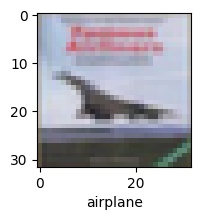

In [34]:
plot_sample(x_test,y_test,3)

In [35]:
classes[y_classes[3]]

'airplane'

In [36]:
classes[y_classes[3]]

'airplane'